In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Predictive Maintenance.csv")

In [3]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [4]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [5]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [6]:
df.drop(columns = ["UDI", "Product ID"], axis = 1, inplace = True)

In [7]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [8]:
df["Type"] = df["Type"].map({"L" : 0, "M" : 1, "H" : 2})

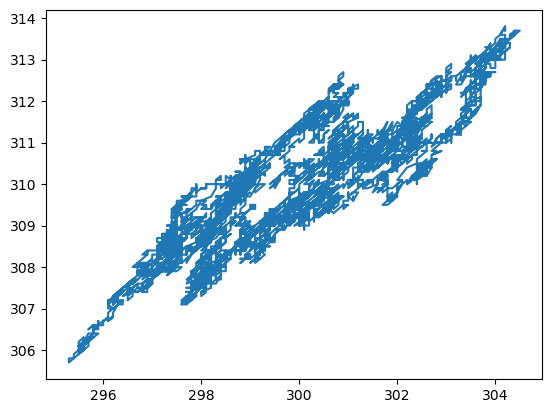

In [9]:
plt.plot(df["Air temperature [K]"], df["Process temperature [K]"])

<Axes: xlabel='Air temperature [K]', ylabel='Process temperature [K]'>

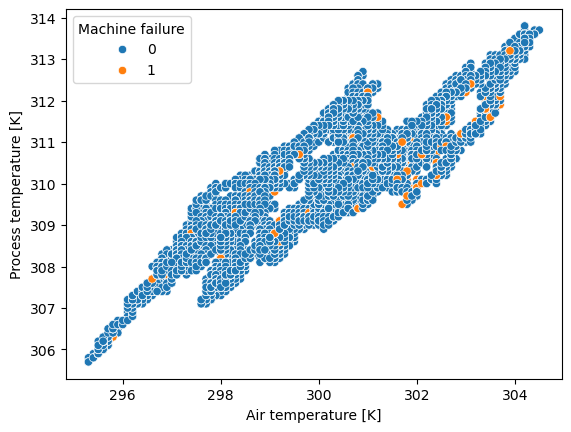

In [10]:
sns.scatterplot(x = df["Air temperature [K]"], y = df["Process temperature [K]"], hue = df["Machine failure"])

In [11]:
df["Machine failure"].value_counts()

Machine failure
0    9661
1     339
Name: count, dtype: int64

In [12]:
cont_num_cols = ["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]"]

In [13]:
df.drop(columns = ["TWF", "HDF", "PWF", "RNF", "OSF"], inplace = True)

In [14]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,1,298.1,308.6,1551,42.8,0,0
1,0,298.2,308.7,1408,46.3,3,0
2,0,298.1,308.5,1498,49.4,5,0
3,0,298.2,308.6,1433,39.5,7,0
4,0,298.2,308.7,1408,40.0,9,0


In [15]:
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure'],
      dtype='object')

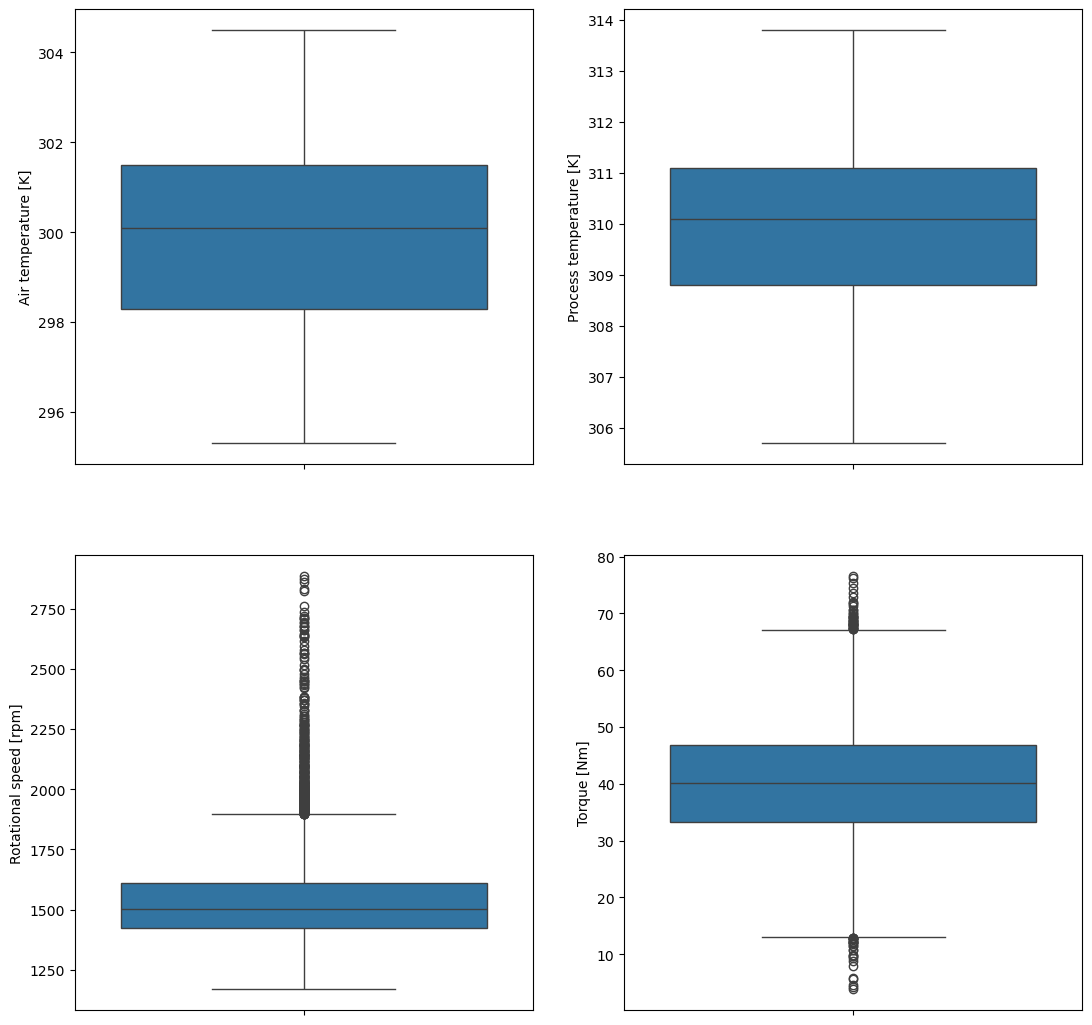

In [16]:
fig, axis = plt.subplots(nrows = 2, ncols = 2, figsize = (13, 13))
columns = df.drop(columns = ["Type"]).columns.to_list()
k = 0
for i in range(2):
    for j in range(2):
        sns.boxplot(y = df[columns[k]], ax = axis[i][j])
        k = k + 1

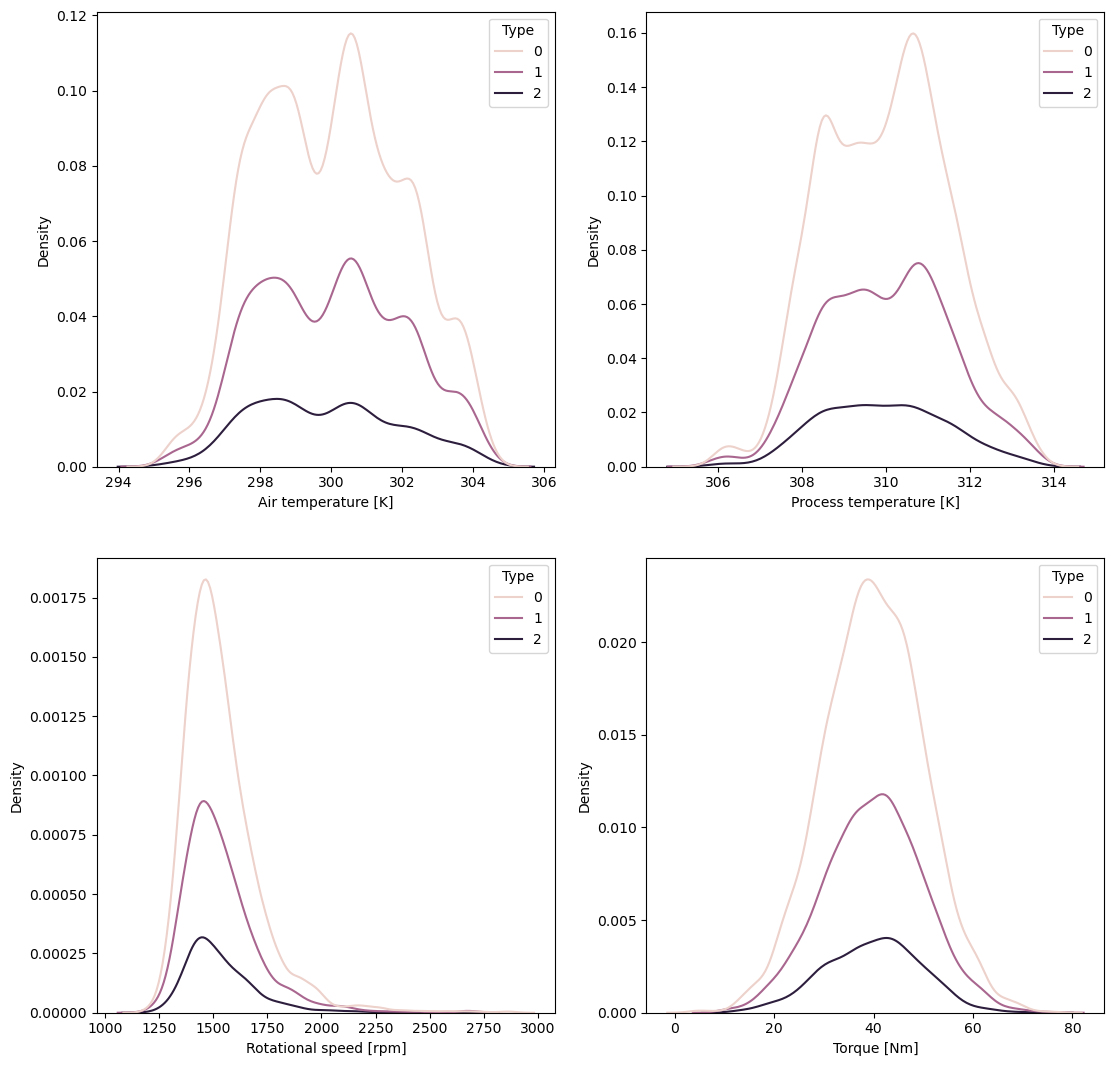

In [17]:
fig, axis = plt.subplots(nrows = 2, ncols = 2, figsize = (13, 13))
k = 0
for i in range(2):
    for j in range(2):
        sns.kdeplot(x = df[columns[k]], hue = df["Type"], ax = axis[i][j])
        k = k + 1

In [18]:
df["Rotational speed [rpm]"] = np.log(df["Rotational speed [rpm]"])

<Axes: xlabel='Rotational speed [rpm]', ylabel='Density'>

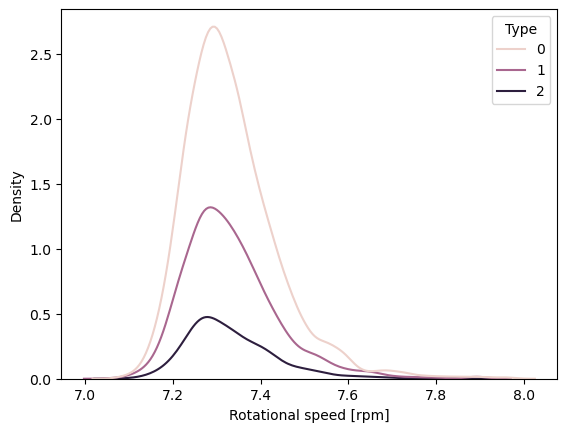

In [19]:
sns.kdeplot(x = df["Rotational speed [rpm]"], hue = df["Type"])

<Axes: xlabel='Rotational speed [rpm]', ylabel='Torque [Nm]'>

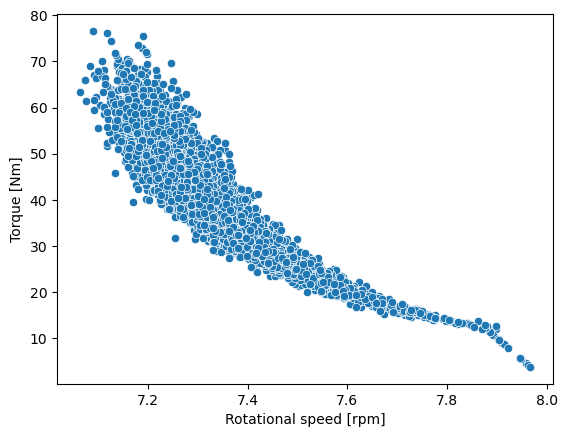

In [20]:
sns.scatterplot(x = df["Rotational speed [rpm]"], y = df["Torque [Nm]"]) #, df["Torque [Nm]"]

In [21]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [23]:
def remove_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    iqr = q3 - q1
    l_l = q1 - 1.5 * iqr
    u_l = q3 + 1.5 * iqr

    return l_l, u_l

In [24]:
l_l, u_l = remove_outliers(df, "Rotational speed [rpm]")
df.loc[df["Rotational speed [rpm]"] > u_l, "Rotational speed [rpm]"] = u_l
df.loc[df["Rotational speed [rpm]"] < l_l, "Rotational speed [rpm]"] = l_l

l_l, u_l = remove_outliers(df, "Torque [Nm]")
df.loc[df["Torque [Nm]"] > u_l, "Torque [Nm]"] = u_l
df.loc[df["Torque [Nm]"] < l_l, "Torque [Nm]"] = l_l

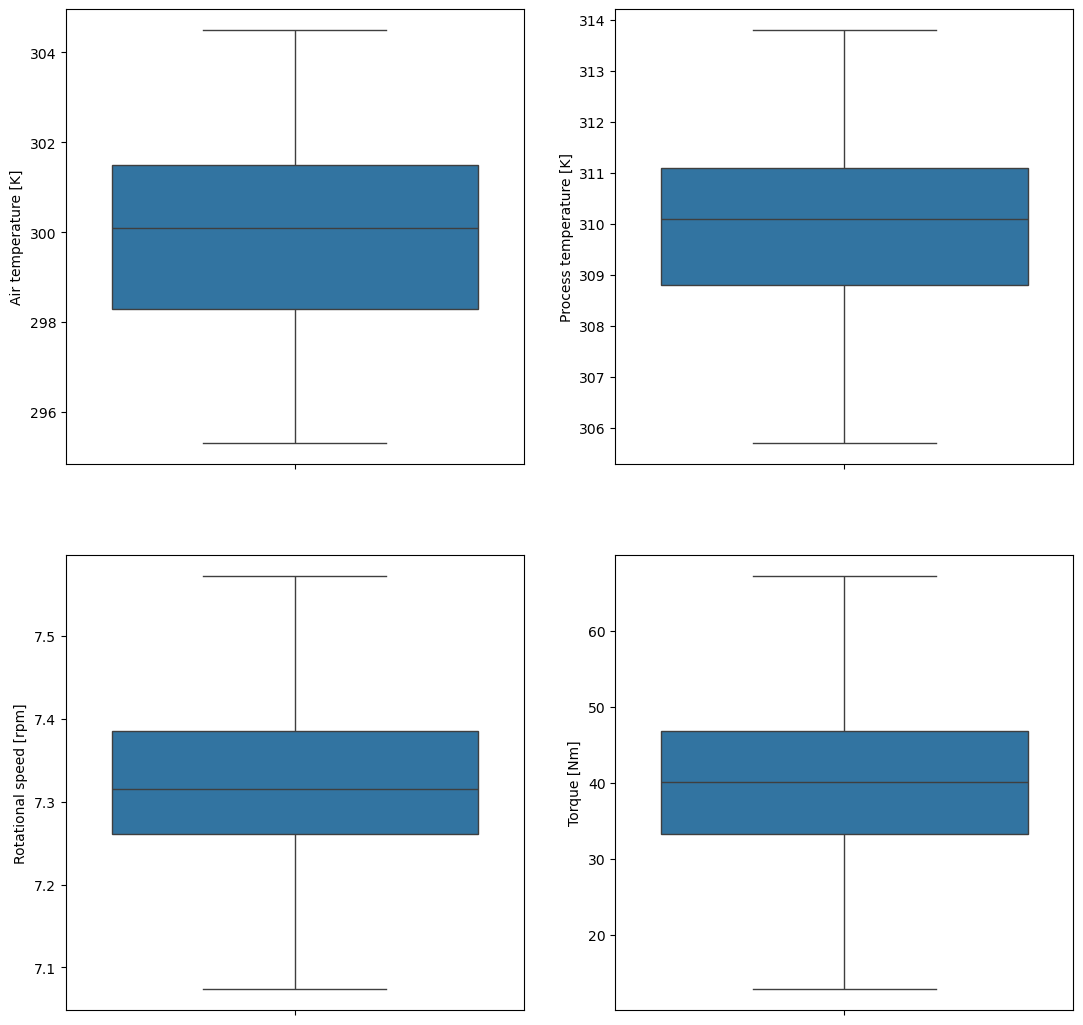

In [25]:
fig, axis = plt.subplots(nrows = 2, ncols = 2, figsize = (13, 13))
k = 0
for i in range(2):
    for j in range(2):
        sns.boxplot(y = df[columns[k]], ax = axis[i][j])
        k = k + 1

In [26]:
robust_obj = RobustScaler()
df[columns] = robust_obj.fit_transform(df[columns])

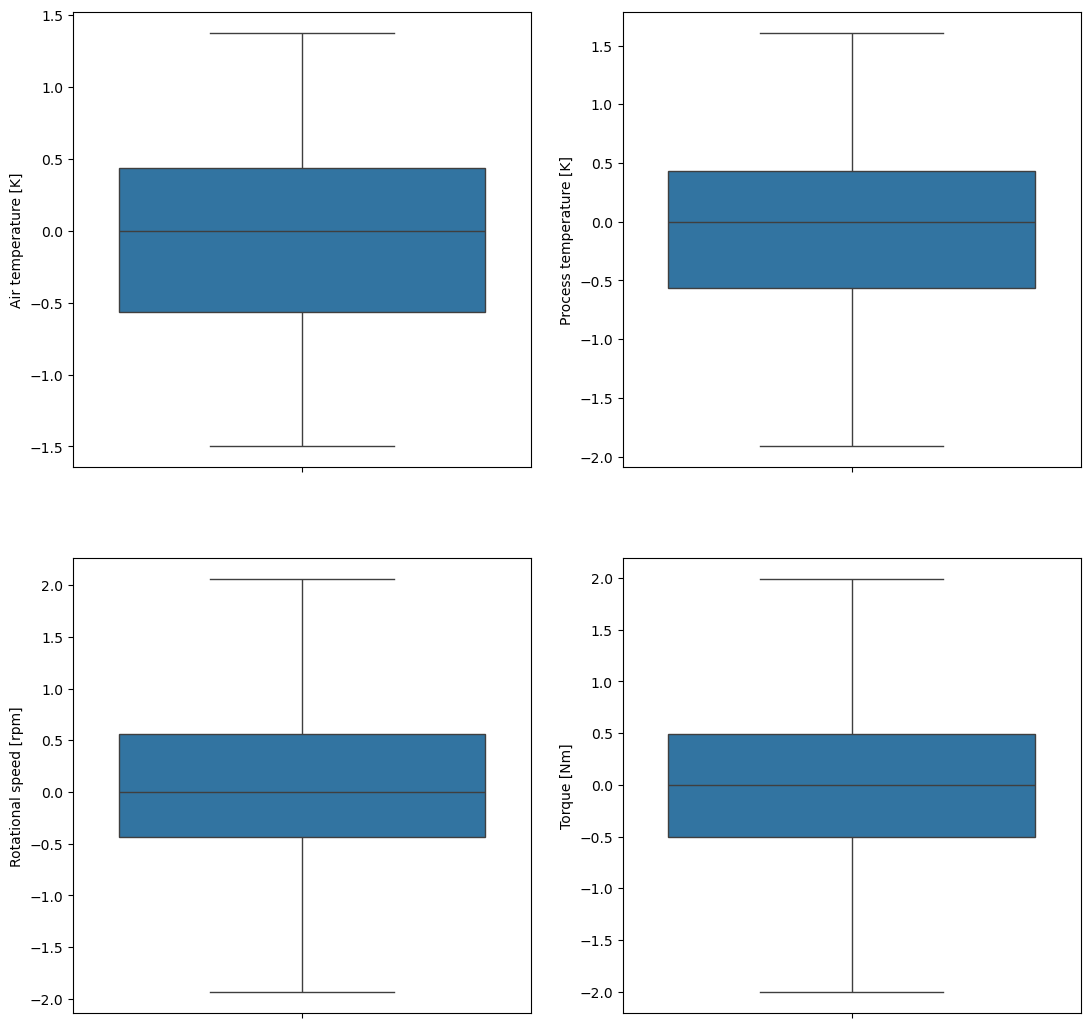

In [27]:
fig, axis = plt.subplots(nrows = 2, ncols = 2, figsize = (13, 13))
k = 0
for i in range(2):
    for j in range(2):
        sns.boxplot(y = df[columns[k]], ax = axis[i][j])
        k = k + 1

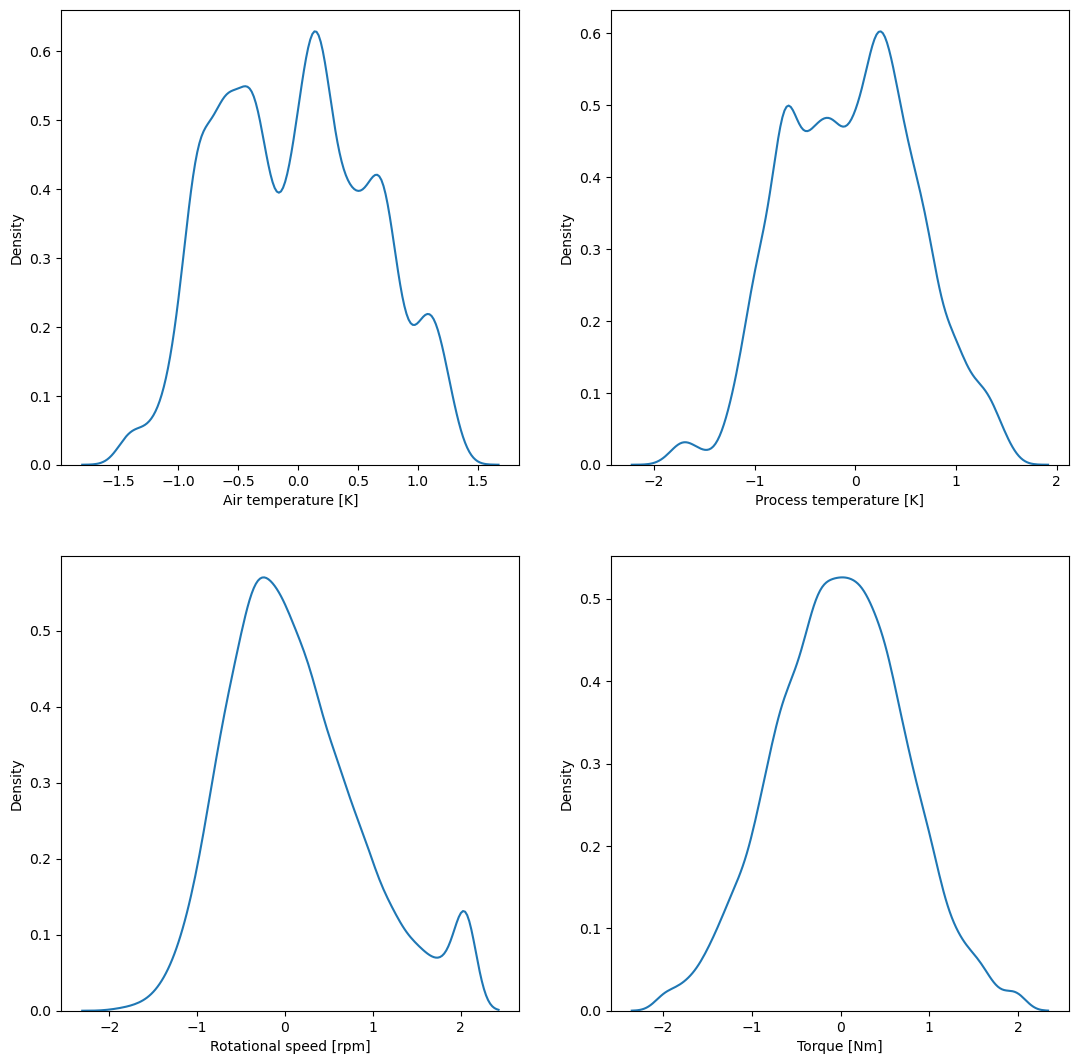

In [28]:
fig, axis = plt.subplots(nrows = 2, ncols = 2, figsize = (13, 13))
k = 0
for i in range(2):
    for j in range(2):
        sns.kdeplot(x = df[columns[k]], ax = axis[i][j])
        k = k + 1

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [30]:
from imblearn.ensemble import BalancedBaggingClassifier, BalancedRandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split

In [31]:
X = df.drop(columns = ["Machine failure"])
y = df["Machine failure"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

### Balanced Bagging Classifier

In [90]:
param = {'bootstrap' : [True, False], "bootstrap_features" : [True, False], "n_estimators" : [10, 20, 30, 40, 50 ,60 ,70]}

In [100]:
a = BalancedBaggingClassifier(estimator = DecisionTreeClassifier(random_state = 42))

In [101]:
bgc = GridSearchCV(estimator = a , param_grid = param, n_jobs = -1)

In [111]:
bgc.fit(X, y)

GridSearchCV(estimator=BalancedBaggingClassifier(estimator=DecisionTreeClassifier(random_state=42)),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70]})

In [112]:
bgc.best_params_

{'bootstrap': True, 'bootstrap_features': False, 'n_estimators': 20}

In [113]:
bgc.best_score_

0.8907

In [114]:
bbc = bgc.best_estimator_

In [115]:
bbc.fit(X, y)

BalancedBaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                          n_estimators=20)

In [116]:
from sklearn.metrics import classification_report, confusion_matrix

<Axes: >

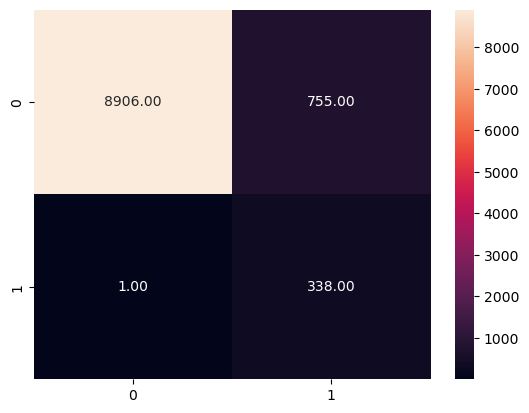

In [117]:
sns.heatmap(confusion_matrix(y, bbc.predict(X)), annot = True, fmt = ".2f")

In [88]:
y_preds = bbc.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96      1939
         1.0       0.29      1.00      0.45        61

    accuracy                           0.92      2000
   macro avg       0.64      0.96      0.70      2000
weighted avg       0.98      0.92      0.94      2000



### Random Under-Sampling

In [120]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X, y)

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, random_state = 2, test_size = 0.2)

In [123]:
rfr = RandomForestClassifier()

In [128]:
param_grid = {"n_estimators" : [100, 150, 200, 250, 300, 350], "max_depth" : [3, 4, 5, 6, 7, 8], "criterion" : ["gini", "entropy", "log_loss"],
             "min_samples_split" : [2, 3, 4 ,5]}

In [129]:
rfr_cv = GridSearchCV(RandomForestClassifier(), cv = 3, n_jobs = -1, param_grid = param_grid)

In [130]:
rfr_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [100, 150, 200, 250, 300, 350]})

In [133]:
rfr = rfr_cv.best_estimator_
rfr.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_split=3,
                       n_estimators=300)

In [134]:
y_pred = rfr.predict(X_test)

In [135]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94        70
         1.0       0.93      0.94      0.93        66

    accuracy                           0.93       136
   macro avg       0.93      0.93      0.93       136
weighted avg       0.93      0.93      0.93       136



### Random Over-Sampling

In [151]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, random_state = 42, test_size = 42)

In [139]:
from sklearn.svm import SVC

In [144]:
param_grid = {"C" : [0.001, 0.01, 0.1, 1, 0.5, 0.05, 0.03, 0.3], "kernel" : ["linear", "poly", "rbf", "sigmoid"]}

In [145]:
svc_cv = GridSearchCV(SVC(), param_grid = param_grid, cv = 5, n_jobs = -1)

In [146]:
svc_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 0.5, 0.05, 0.03, 0.3],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [147]:
svc_cv.best_score_

0.9306535269709544

In [153]:
svc = svc_cv.best_estimator_
svc.fit(X_train, y_train)

SVC(C=1)

<Axes: >

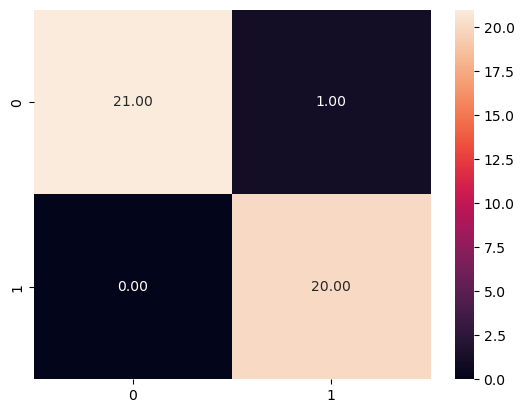

In [154]:
y_pred = svc.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = ".2f")

In [155]:
X_test.shape

(42, 6)

In [156]:
X_train.shape

(19280, 6)

In [158]:
y_train[y_train == 0].shape

(9639,)

<Axes: >

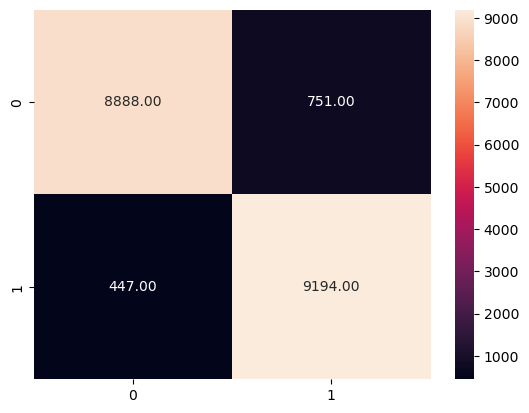

In [159]:
sns.heatmap(confusion_matrix(y_train, svc.predict(X_train)), annot = True, fmt = ".2f")